# Predicting the Future

In this assignment, we'll attempt to make a prediction of a timeseries dataset using a linear prediction.

First, the code below will create a pandas dataframe of noisy timeseries data. To keep things simple, the x-axis won't actually be a datetime, but rather just a number starting at 0 and going to 100 (but we can imagine ways to convert datetime axis into numeric ones in the future).

Don't change this code but take a look at the dataframe to get familiar with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Generate a time series with a linear trend and some noise
x = np.arange(0, 100)  # X-axis: 0 to 99
trend = 2 * x  # Linear trend
noise = np.random.normal(0, 10, size=len(x))  # Random noise
data = trend + noise

# Create a DataFrame
df = pd.DataFrame({'Time': x, 'Value': data})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    100 non-null    int64  
 1   Value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


# 1. Visualize the Data

For this step, use matplotlib and seaborn to visualize the data.

Here's a reminder on how to do a line-plot using Seaborn.

Set `x_col_name` and `y_col_name` accordingly.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size and shape
plt.figure(figsize=(10, 6))

# Lineplot of col_name where x is the dataframe index
sns.lineplot(x=x_col_name,y=y_col_name, data=df)
```

<Axes: xlabel='Time', ylabel='Value'>

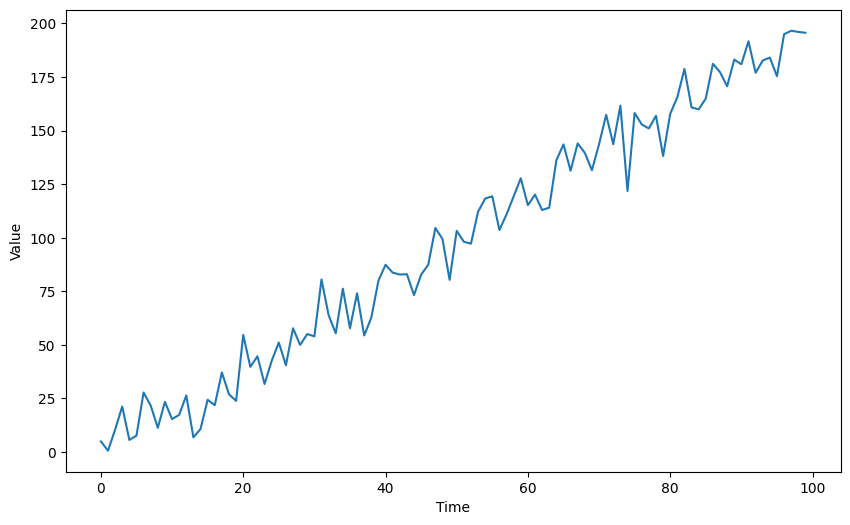

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x="Time", y="Value", data=df)

# 2. Fit a Linear Regression


## Refresher

A Linear Regression is a method to calculate the line for a sample of data-points.

To do this:

1. The slope $b_1$ is calculated using the formula:
$$
b_1 = \frac{\sum{(X - \bar{X})(Y - \bar{Y})}}{\sum{(X - \bar{X})^2}}
$$

2. The intercept $b_0$ is calculated using the formula:
$$
b_0 = \bar{Y} - b_1 \bar{X}
$$

3. The linear regression equation $Y$ is given by:
$$
Y = b_0 + b_1X
$$

From there, we would use these $b_0$ and $b_1$ values to calculate new values in the future.

However, the `sklearn` python package can do this for us using the `LinearRegression` model.

Use the code below to generate a forecast_df.

```python
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = df[['Time']]
y = df['Value']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate future values
future_steps = 20
future_X = pd.DataFrame({'Time': range(100, 100 + future_steps)})

# Predict future values
future_y = model.predict(future_X)

# Create a DataFrame for the forecast
forecast_df = future_X
forecast_df['Value'] = future_y
```

As you do, inspect each line and try to guess what's happening here. This is your first Machine Learning code.

In [12]:
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = df[['Time']]
y = df['Value']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate future values
future_steps = 100
future_X = pd.DataFrame({'Time': range(0, 100 + future_steps)})

# Predict future values
future_y = model.predict(future_X)

# Create a DataFrame for the forecast
forecast_df = future_X
forecast_df['Value'] = future_y






3. Plot the Results

Finally, plot the results. To do this, plot both the original `df` and the new `forcast_df`. Use seaborn's `sns.lineplot` method but pass a `color=red` to the forcast so that it looks different.

Here's an example of calling `sns.lineplot`.
```python
import seaborn as sns

sns.lineplot(data=..., x=..., y=..., label=..., color=...)
```


<Axes: xlabel='Time', ylabel='Value'>

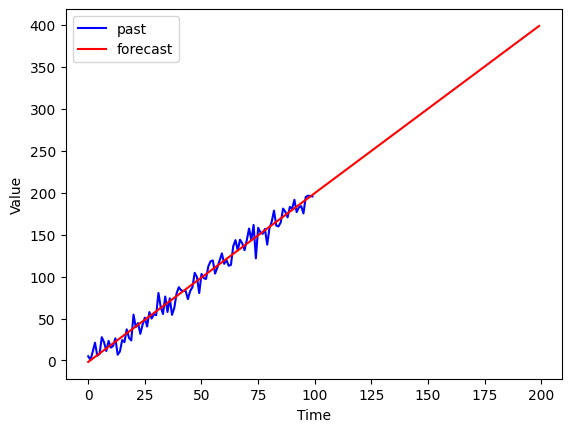

In [13]:
import seaborn as sns

sns.lineplot(data=df, x="Time", y="Value", label="past", color="Blue")
sns.lineplot(data=forecast_df, x="Time", y="Value", label="forecast", color="Red")




